In [1]:
import pandas as pd

In [2]:
strokeData = pd.read_csv("healthcare-dataset-stroke-data.csv")
strokeData.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


# Remove ID Column from Dataset

In [3]:
strokeData.drop(['id'],axis=1,inplace=True)

# Binning Age Column

<AxesSubplot:ylabel='Frequency'>

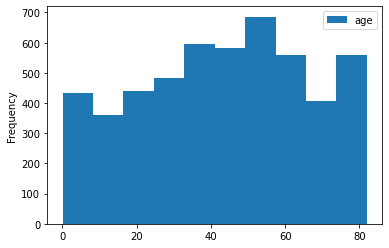

In [4]:
strokeData[['age']].plot.hist()

In [5]:
strokeData['age'] = pd.cut(strokeData['age'],
                           bins=[0,20,40,60,100],
                           labels=["Teenage", "Youth", "Mid Age", "Old Age"])

In [8]:
strokeData['age'] = strokeData['age'].astype(object)

# Train and Test Split

In [10]:
X = strokeData.drop(['stroke'],axis=1)
y = strokeData[['stroke']]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4599, 10), (511, 10), (4599, 1), (511, 1))

# Processing of Train Set

In [19]:
import numpy as np
strokeCategoricalTrain = x_train.select_dtypes(object)
strokeNumericalTrain = x_train.select_dtypes(np.number)

In [20]:
### Processing of Categorical Data

In [21]:
strokeCategoricalTrain.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohEncoder = OneHotEncoder()

In [23]:
ohEncoder.fit(strokeCategoricalTrain)

OneHotEncoder()

In [27]:
strokeCategoricalTrainEncoded = pd.DataFrame(ohEncoder.transform(strokeCategoricalTrain).toarray())

In [28]:
### Numerical Data Processing

In [36]:
strokeNumericalTrain.isna().sum()

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [35]:
strokeNumericalTrain['bmi'] = strokeNumericalTrain['bmi'].interpolate(method='polynomial', order=5)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
from sklearn.preprocessing import RobustScaler
robScale = RobustScaler()

In [39]:
robScale.fit(strokeNumericalTrain)

RobustScaler()

In [42]:
strokeNumericalTrainEncoded = pd.DataFrame(robScale.transform(strokeNumericalTrain),
                                           columns = strokeNumericalTrain.columns)

# Concatenation of Numerical and Categorical

In [44]:
trainSet = pd.concat([strokeNumericalTrainEncoded, strokeCategoricalTrainEncoded],
                     axis=1)

# Training Logistic Regression Model with OLS and Stochastic Gradient Descent

In [47]:
y_train.value_counts()

stroke
0         4375
1          224
dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
logReg = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=0.3, 
                            fit_intercept=True, intercept_scaling=1, 
                            class_weight={0:1, 1:5}, random_state=42, 
                            solver='lbfgs', 
                            max_iter=1000, multi_class='auto', verbose=0, 
                            warm_start=False, n_jobs=None, l1_ratio=None)
sgdClass = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, 
                         l1_ratio=0.15, fit_intercept=True, max_iter=10000, 
                         tol=0.001, shuffle=True, verbose=0, epsilon=0.1, 
                         n_jobs=None, random_state=42, learning_rate='optimal', 
                         eta0=0.0, power_t=0.5, early_stopping=False, 
                         validation_fraction=0.1, n_iter_no_change=100, 
                         class_weight={0:1, 1:5}, warm_start=False, average=False)

In [56]:
logReg.fit(trainSet, y_train)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.3, class_weight={0: 1, 1: 5}, max_iter=1000,
                   random_state=42)

In [57]:
sgdClass.fit(trainSet, y_train)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(class_weight={0: 1, 1: 5}, max_iter=10000, n_iter_no_change=100,
              random_state=42)

# Processing Test Set

In [71]:
import numpy as np
strokeCategoricalTest = x_test.select_dtypes(object)
strokeNumericalTest = x_test.select_dtypes(np.number)

In [72]:
### Processing of Categorical Data

In [73]:
strokeCategoricalTest.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [74]:
strokeCategoricalTestEncoded = pd.DataFrame(ohEncoder.transform(strokeCategoricalTest).toarray())

In [75]:
### Numerical Data Processing

In [81]:
strokeNumericalTest.isna().sum()

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [78]:
strokeNumericalTest['bmi'] = strokeNumericalTest['bmi'].interpolate(method='polynomial', order=3)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
strokeNumericalTest['bmi'] = strokeNumericalTest['bmi'].fillna(strokeNumericalTest['bmi'].mean())

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
strokeNumericalTestEncoded = pd.DataFrame(robScale.transform(strokeNumericalTest),
                                           columns = strokeNumericalTest.columns)

# Concatenation of Numerical and Categorical

In [83]:
testSet = pd.concat([strokeNumericalTestEncoded, strokeCategoricalTestEncoded],
                     axis=1)

In [85]:
predictionsLogReg = logReg.predict(testSet)
predictionsSGDClass = sgdClass.predict(testSet)

In [102]:
logRegProbs = logReg.predict_proba(testSet)

In [111]:
predictionsLogReg = np.where(logRegProbs[:,1]>0.6, 1, 0)

# Classification Metrics

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

## Metrics for Logistic Regression OLS

In [112]:
confusion_matrix(predictionsLogReg, y_test)

array([[483,  21],
       [  3,   4]])

In [113]:
accuracy_score(predictionsLogReg, y_test)

0.9530332681017613

In [114]:
recall_score(predictionsLogReg, y_test)

0.5714285714285714

In [115]:
precision_score(predictionsLogReg, y_test)

0.16

In [116]:
f1_score(predictionsLogReg, y_test)

0.25

## Stochastic Classifier

In [92]:
confusion_matrix(predictionsSGDClass, y_test)

array([[473,  22],
       [ 13,   3]])

In [93]:
accuracy_score(predictionsSGDClass, y_test)

0.9315068493150684

In [94]:
recall_score(predictionsSGDClass, y_test)

0.1875

In [95]:
precision_score(predictionsSGDClass, y_test)

0.12

In [96]:
f1_score(predictionsSGDClass, y_test)

0.14634146341463414

# ROC Curve Building

Logistic: ROC AUC=0.740


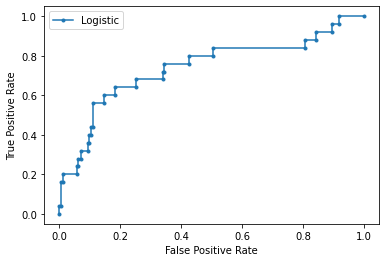

In [101]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


# predict probabilities
lr_probs = logReg.predict_proba(testSet)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the y_test
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()